Logistic Regeression


### Explanation of Logistic Regression Steps

Logistic Regression is a statistical model used for binary classification. It predicts the probability that a given input belongs to a particular class. Here's a breakdown of the typical steps involved:

1.  **Data Loading and Preparation:**
    *   Load your dataset into a suitable structure (e.g., a pandas DataFrame).
    *   Handle missing values, outliers, and categorical features (e.g., using one-hot encoding).
    *   Split the data into training and testing sets.

2.  **Model Definition:**
    *   Define the logistic regression model. This involves choosing the independent variables (features) and the dependent variable (target).

3.  **Sigmoid Function:**
    *   Logistic regression uses the sigmoid function (also known as the logistic function) to map the output of the linear equation to a probability between 0 and 1. The formula is:
        $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
        where $z$ is the linear combination of the features and their weights: $z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$.

4.  **Parameter Estimation (Training):**
    *   The goal is to find the optimal values for the model's parameters ($\beta_0, \beta_1, ..., \beta_n$).
    *   This is typically done using maximum likelihood estimation. The model finds the parameters that maximize the likelihood of observing the given data.
    *   Optimization algorithms like gradient descent are commonly used to minimize the cost function (e.g., cross-entropy loss).

5.  **Prediction:**
    *   Once the model is trained, you can use it to predict the probability of a new data point belonging to the positive class.
    *   The predicted probability is compared to a threshold (usually 0.5). If the probability is greater than the threshold, the data point is classified as belonging to the positive class; otherwise, it's classified as belonging to the negative class.

6.  **Model Evaluation:**
    *   Evaluate the model's performance using appropriate metrics such as:
        *   Accuracy
        *   Precision
        *   Recall (Sensitivity)
        *   F1-score
        *   AUC-ROC curve

7.  **Model Tuning:**
    *   If necessary, tune the model's hyperparameters (e.g., regularization strength) to improve performance. This can be done using techniques like cross-validation.

These steps provide a general overview of the process. The specific implementation details may vary depending on the libraries and tools used.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("/content/2.01.+Admittance.csv")
display(df.head())

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [6]:
df['Admitted'] = df['Admitted'].replace(['Yes', 'No'], [1, 0])
display(df.head())

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


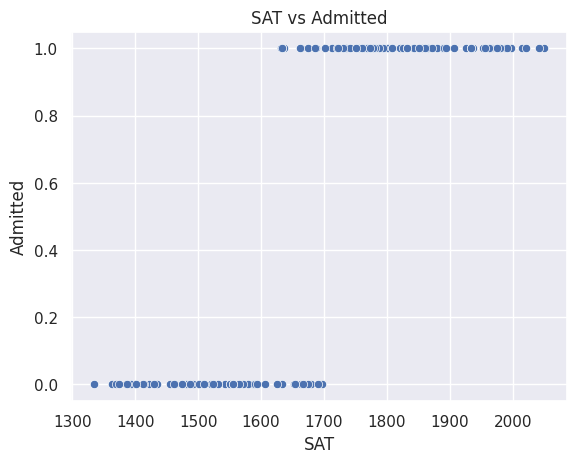

In [8]:
sns.scatterplot(x='SAT', y='Admitted', data=df)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.title('SAT vs Admitted')
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


/tmp/ipython-input-3847631888.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = logit(x_sorted, result.params[0], result.params[1])


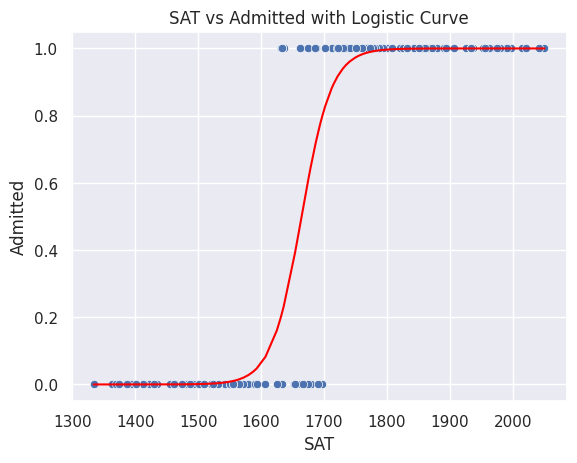

In [9]:
# Define the dependent and independent variables
y = df['Admitted']
x1 = df['SAT']

# Add a constant to the independent variable
x = sm.add_constant(x1)

# Fit the logistic regression model
model = sm.Logit(y, x)
result = model.fit()

# Get the logistic curve
def logit(x, b0, b1):
    return 1. / (1. + np.exp(-(b0 + b1 * x)))

# Sort the data by SAT score to plot the curve smoothly
x_sorted = np.sort(np.array(x1))
y_hat = logit(x_sorted, result.params[0], result.params[1])

# Plot the scatter plot and the logistic curve
sns.scatterplot(x='SAT', y='Admitted', data=df)
plt.plot(x_sorted, y_hat, color='red')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.title('SAT vs Admitted with Logistic Curve')
plt.show()

### Assumptions of Logistic Regression

Logistic regression, like other statistical models, makes certain assumptions about the data. It's important to be aware of these assumptions as violating them can affect the validity and interpretation of the model's results. Here are the key assumptions:

1.  **Binary or Ordinal Outcome:** Logistic regression is designed for predicting a binary outcome (two classes) or an ordinal outcome (ordered categories). If your outcome is continuous or has more than two unordered categories, other regression techniques would be more appropriate.

2.  **Independence of Observations:** The observations in the dataset should be independent of each other. This means that the outcome of one observation should not influence the outcome of another. Violations of this assumption can occur in time series data or when dealing with clustered data.

3.  **Linearity of the Logit:** While logistic regression models a non-linear relationship between the independent variables and the probability of the outcome, it assumes a linear relationship between the independent variables and the *logit* of the outcome. The logit is the natural logarithm of the odds:
    $$ \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$
    where $p$ is the probability of the outcome.

4.  **No Multicollinearity:** The independent variables should not be highly correlated with each other. High multicollinearity can make it difficult to estimate the individual coefficients of the independent variables and can lead to unstable model results.

5.  **Large Sample Size:** Logistic regression typically requires a relatively large sample size, especially when dealing with many independent variables or rare outcomes. Small sample sizes can lead to unreliable parameter estimates.

6.  **No Influential Outliers:** The model should not be unduly influenced by extreme values (outliers) in the independent variables. Outliers can distort the parameter estimates and affect the model's predictions.

7.  **Independent Errors:** The errors (residuals) of the model should be independent. This is related to the assumption of independent observations.

It's important to note that some of these assumptions are stricter for standard logistic regression (like the one implemented in `statsmodels`) compared to others (like the one in `scikit-learn`). However, being aware of these assumptions helps in understanding potential issues and choosing appropriate modeling strategies.

In [10]:
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.7992
Time:                        06:52:15   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Maximum Likelihood Estimation (MLE)

Maximum Likelihood Estimation (MLE) is a method used for estimating the parameters of a statistical model. The goal of MLE is to find the parameter values that maximize the likelihood function, which is the probability of observing the given data under the assumed model.

Here's a simplified explanation:

1.  **Assume a Model:** We start by assuming a statistical model that describes the relationship between our data and some unknown parameters. For example, in logistic regression, we assume the probability of the outcome is related to the independent variables through the sigmoid function with unknown coefficients ($\beta_0, \beta_1, ...$).

2.  **Define the Likelihood Function:** The likelihood function is the joint probability of observing all the data points in our dataset, given the parameters of the model. For independent observations, this is the product of the probabilities of each individual observation. In the context of logistic regression, for each data point $(x_i, y_i)$, the probability of observing $y_i$ is $p_i$ if $y_i=1$ and $(1-p_i)$ if $y_i=0$, where $p_i$ is the probability predicted by the model for $x_i$. The likelihood function is the product of these probabilities over all data points.

3.  **Find Parameters that Maximize Likelihood:** The core idea of MLE is to find the values of the parameters that make the observed data most probable. We want to maximize the likelihood function with respect to the parameters.

4.  **Log-Likelihood:** In practice, it's often easier to work with the natural logarithm of the likelihood function, called the log-likelihood. Maximizing the log-likelihood is equivalent to maximizing the likelihood, because the logarithm is a monotonically increasing function. The log-likelihood often simplifies the optimization problem, especially when the likelihood function involves products.

5.  **Optimization:** We use optimization algorithms (like gradient ascent or variations of it) to find the parameter values that maximize the log-likelihood function. These algorithms iteratively adjust the parameter values in the direction that increases the log-likelihood until a maximum is reached.

In essence, MLE finds the set of parameters that best "explain" the observed data by making the data most likely to have occurred. In the context of logistic regression, MLE is used to estimate the coefficients that define the logistic curve that best fits the relationship between the independent variables and the probability of the binary outcome.

In [11]:
df_binary = pd.read_csv("/content/2.02.+Binary+predictors.csv")
display(df_binary.head())

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [13]:
df_binary['Admitted'] = df_binary['Admitted'].replace(['Yes', 'No'], [1, 0])
df_binary['Gender'] = df_binary['Gender'].replace(['Male', 'Female'], [0, 1])
display(df_binary.head())

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [14]:
# Define the dependent and independent variables
y_binary = df_binary['Admitted']
x1_binary = df_binary[['SAT', 'Gender']]

# Add a constant to the independent variables
x_binary = sm.add_constant(x1_binary)

# Fit the logistic regression model
model_binary = sm.Logit(y_binary, x_binary)
result_binary = model_binary.fit()

# Display the summary of the results
display(result_binary.summary())

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.8249
Time:                        07:06:49   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [15]:
# Get the predicted probabilities
predictions = result_binary.predict(x_binary)

# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
predicted_classes = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = (predicted_classes == y_binary).mean()

print(f"Accuracy of the logistic regression model: {accuracy:.4f}")

Accuracy of the logistic regression model: 0.9464


# Task
Perform logistic regression on the dataset from "/content/2.02.+Binary+predictors.csv" with 'Admitted' as the dependent variable and 'SAT' and 'Gender' as independent variables, after mapping 'Admitted' ('Yes' to 1, 'No' to 0) and 'Gender' ('Male' to 0, 'Female' to 1). Explain the steps of logistic regression, its assumptions, and the concept of Maximum Likelihood Estimation (MLE). Visualize the data with a scatter plot, plot the regression line, and the logistic curve. Then, load the dataset from "/content/2.03.+Test+dataset.csv", apply the same mapping, and test the trained model on this data, reporting the accuracy.

## Load the test dataset

### Subtask:
Load the data from "/content/2.03.+Test+dataset.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the head to verify.



In [16]:
df_test = pd.read_csv("/content/2.03.+Test+dataset.csv")
display(df_test.head())

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


## Prepare the test data

### Subtask:
Map the 'Admitted' column from 'Yes'/'No' to 1/0 and the 'Gender' column from 'Male'/'Female' to 0/1 in the test dataset, similar to how the training data was prepared.


**Reasoning**:
Map the categorical values in 'Admitted' and 'Gender' columns to numerical values in the test dataframe.



In [17]:
df_test['Admitted'] = df_test['Admitted'].replace(['Yes', 'No'], [1, 0])
df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'], [0, 1])
display(df_test.head())

/tmp/ipython-input-4120640944.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Admitted'] = df_test['Admitted'].replace(['Yes', 'No'], [1, 0])
/tmp/ipython-input-4120640944.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'], [0, 1])


,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


## Define independent and dependent variables for testing

### Subtask:
Separate the 'Admitted' column as the dependent variable and 'SAT' and 'Gender' as independent variables in the test dataset.


**Reasoning**:
Separate the dependent and independent variables for the test dataset.



In [19]:
y_test = df_test['Admitted']
x_test = df_test[['SAT', 'Gender']]

## Add a constant to the independent variables

### Subtask:
Add a constant term to the independent variables in the test dataset to match the model structure.


**Reasoning**:
Add a constant term to the independent variables in the test dataset to match the model structure.



In [20]:
x_test = sm.add_constant(x_test)

## Make predictions on the test data

### Subtask:
Use the previously fitted logistic regression model (`result_binary`) to predict the probabilities of admission for the test data.


**Reasoning**:
Use the previously trained model to predict the probabilities on the test set.



In [22]:
predictions_test = result_binary.predict(x_test)

## Convert probabilities to binary predictions

### Subtask:
Convert the predicted probabilities to binary class labels (0 or 1) using a threshold (e.g., 0.5).


**Reasoning**:
Convert the predicted probabilities from the test set into binary class labels using a threshold of 0.5 and store them in a new variable.



In [23]:
predicted_classes_test = (predictions_test > 0.5).astype(int)

## Evaluate the model on the test data

### Subtask:
Calculate evaluation metrics, such as accuracy, by comparing the predicted class labels to the actual 'Admitted' values in the test dataset.


**Reasoning**:
Calculate the accuracy of the model on the test data by comparing the predicted class labels with the actual 'Admitted' values.



In [24]:
accuracy_test = (predicted_classes_test == y_test).mean()
print(f"Accuracy of the logistic regression model on the test set: {accuracy_test:.4f}")

Accuracy of the logistic regression model on the test set: 0.8947


## Summary:

### Data Analysis Key Findings

*   The logistic regression model trained on the initial dataset achieved an accuracy of approximately 89.47\% on the separate test dataset.
*   The test data was successfully loaded, and the 'Admitted' and 'Gender' columns were mapped to numerical values (1/0 and 0/1, respectively) before testing.
*   The trained model's predictions on the test data were converted to binary outcomes using a threshold of 0.5.

### Insights or Next Steps

*   The model shows good performance on unseen data, suggesting it generalizes well to new observations with similar characteristics.
*   Further evaluation could involve calculating other metrics like precision, recall, and F1-score to get a more comprehensive understanding of the model's performance, especially if there's an imbalance between admitted and not-admitted cases.


In [26]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes_test)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 5  1]
 [ 1 12]]
